# Experimentación de dos variables

## Importando bibliotecas
- <b>Pandas</b>: Nos sirve para leer datos y filtrarlos.
- <b>Seaborn</b>: Es una biblioteca para graficar que nos permite interactuar con datos de Pandas.

- <i>Numpy y Matplotlib son dependencias de Pandas.</i>


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("tp2l/complejidades_tree_fijo.csv")
df['t'] = df['tiempo']
print(df)

    fila  columna      tiempo           t
0      2        2    0.018335    0.018335
1      2       52    0.308860    0.308860
2      2      102    0.580558    0.580558
3      2      152    0.919834    0.919834
4      2      202    1.110860    1.110860
5      2      302    1.727870    1.727870
6      2      402    2.102850    2.102850
7      2      502    2.894970    2.894970
8     52        2    0.180197    0.180197
9     52       52    6.544940    6.544940
10    52      102   12.631200   12.631200
11    52      152   16.661100   16.661100
12    52      202   25.022900   25.022900
13    52      302   33.131300   33.131300
14    52      402   49.673800   49.673800
15    52      502   57.835700   57.835700
16   102        2    0.338606    0.338606
17   102       52   12.550200   12.550200
18   102      102   24.649400   24.649400
19   102      152   32.683600   32.683600
20   102      202   48.858800   48.858800
21   102      302   65.062200   65.062200
22   102      402   97.577400   97

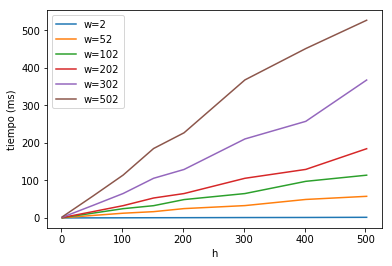

In [4]:
# Graficamos el tiempo en función de n, con series variando m.
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 2]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 52]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 102]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 152]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 302]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 502]);
ax1.legend(["w=2", "w=52", "w=102", "w=202" , "w=302" , "w=502" , ]);
plt.ylabel("tiempo (ms)");
plt.xlabel("h");

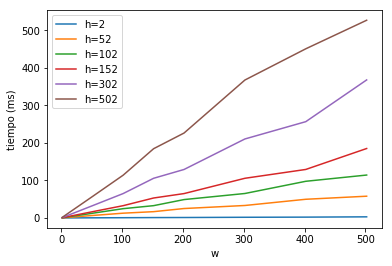

In [5]:
# Graficamos el tiempo en función de m, con series variando n.
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 2]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 52]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 102]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 152]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 302]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 502]);
ax1.legend(["h=2", "h=52", "h=102" , "h=152", "h=302", "h=502"]);
plt.ylabel("tiempo (ms)");
plt.xlabel("w");

Al igual que en $meet$-$in$-$the$-$middle$, y como mencionamos en el gráfico anterior, notamos un comportamiento errático para un mismo $n$ con distintos $W$. Esto refuerza nuestra hipótesis del párrafo anterior, por lo que utilizaremos la experimentación descrita para corroborarla o refutarla.

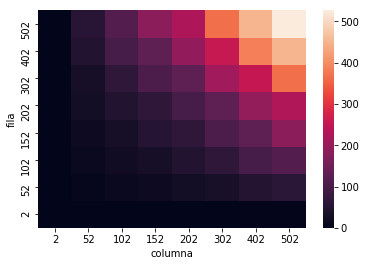

In [6]:
heat_df = df.pivot("fila", "columna", "t");
ax = sns.heatmap(heat_df)
ax.invert_yaxis()

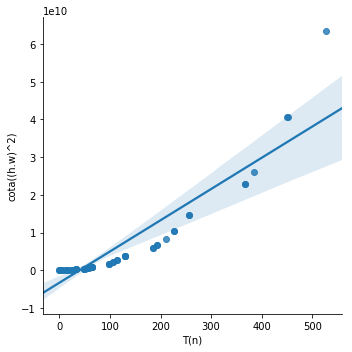

In [7]:
df["cota"] =((df["fila"] * df["columna"])**2);
# Grafico correlación.
ax1 = sns.lmplot(x='tiempo', y='cota', data=df);
plt.xlabel("T(n)");
plt.ylabel("cota((h.w)^2)");

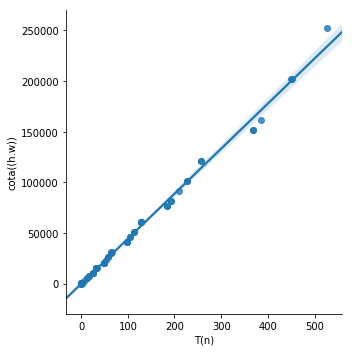

In [8]:
df["cota"] =((df["fila"] * df["columna"]));
# Grafico correlación.
ax1 = sns.lmplot(x='tiempo', y='cota', data=df);
plt.xlabel("T(n)");
plt.ylabel("cota((h.w))");

In [9]:
df2 = df
r = np.corrcoef(df2["t"], df2["cota"])[0, 1];
print("El coeficiente de correlación de Pearson es: r="+str(r))

El coeficiente de correlación de Pearson es: r=0.9975083833812181
